In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

2023-06-05 07:46:43.918766: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from __future__ import print_function
import numpy as np
from numpy import newaxis as na
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.models import Model
from keras import backend as K

import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [3]:
import os
import sys
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
#from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape,  MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D, MaxPool1D



from keras.layers import TimeDistributed
from keras.layers import Bidirectional

from keras.layers import MaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# preparing input to our mode
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

from sklearn import model_selection

In [4]:
import numpy as np
from itertools import permutations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from nltk.stem import PorterStemmer

In [5]:
import sklearn
from keras.initializers import Constant
from keras.layers import *

In [6]:
import pandas as pd
train_df = pd.read_csv('Data/PatentData.csv')
#test_df = pd.read_csv('Data/ccdv/test_processed.csv')
#val_df = pd.read_csv('Data/ccdv/val_processed.csv')

In [7]:
train_df.shape

(1372910, 5)

In [8]:
train_df = train_df.head(100000)

In [9]:
train_df.head()

,Unnamed: 0,id,date,text,class
0,0,8788730,2014-07-22,1. A method for sending a keycode of a non-key...,8
1,1,8621421,2013-12-31,1. A method executed at least in part in a com...,7
2,2,9461433,2016-10-04,1. A light-emitting device comprising: a base;...,8
3,3,9229528,2016-01-05,"1. An input apparatus, comprising: a plurality...",7
4,4,8508147,2013-08-13,"1. A dimmer circuit, comprising: a bleeder as ...",8


In [10]:
train_df = train_df[['text','class']]
#test_df = test_df[['abstract','class']]
#val_df = test_df[['abstract','class']]

In [11]:
train_df.head()

,text,class
0,1. A method for sending a keycode of a non-key...,8
1,1. A method executed at least in part in a com...,7
2,1. A light-emitting device comprising: a base;...,8
3,"1. An input apparatus, comprising: a plurality...",7
4,"1. A dimmer circuit, comprising: a bleeder as ...",8


<Axes: >

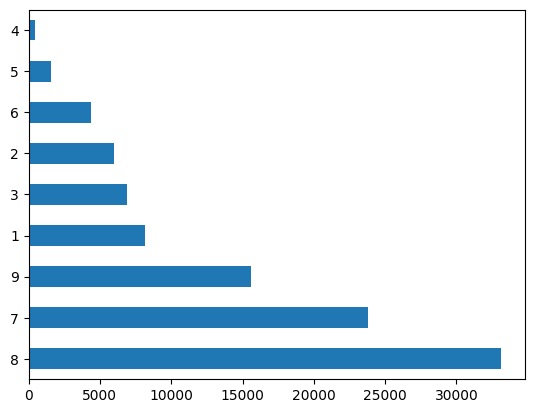

In [12]:
train_df['class'].value_counts().plot(kind='barh')

In [13]:
'''
train_x = train_df['abstract']
test_x = test_df['abstract']
valid_x = val_df['abstract']
encoder = sklearn.preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_df['class'])
test_y = encoder.fit_transform(test_df['class'])
valid_y = encoder.fit_transform(val_df['class'])
'''

"\ntrain_x = train_df['abstract']\ntest_x = test_df['abstract']\nvalid_x = val_df['abstract']\nencoder = sklearn.preprocessing.LabelEncoder()\ntrain_y = encoder.fit_transform(train_df['class'])\ntest_y = encoder.fit_transform(test_df['class'])\nvalid_y = encoder.fit_transform(val_df['class'])\n"

In [14]:

import sklearn
train_x, test_x, train_y, test_y = model_selection.train_test_split(train_df['text'], train_df['class'], test_size=0.20)
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_x, train_y, test_size=0.15)
encoder = sklearn.preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
test_y = encoder.fit_transform(test_y)


In [15]:
max_features = 32000

maxlen = 300
batch_size = 32

In [16]:
tokenizer  = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(train_x)

train_seq =  tokenizer.texts_to_sequences(train_x)
val_seq =  tokenizer.texts_to_sequences(valid_x)
test_seq = tokenizer.texts_to_sequences(test_x)

word_index = tokenizer.word_index

train_x = pad_sequences(train_seq, maxlen=maxlen, dtype='int32', padding='post') #maxlen = maxlen, padding='post')
valid_x = pad_sequences(val_seq, maxlen=maxlen, dtype='int32', padding='post') #maxlen = maxlen, padding='post')
test_x = pad_sequences(test_seq, maxlen=maxlen, dtype='int32', padding='post') #maxlen = maxlen, padding='post')

train_y = np.asarray(train_y)
valid_y = np.asarray(valid_y)
test_y = np.asarray(test_y)


In [17]:
print("Unique words : {}".format(len(word_index)))


print('Shape of training data tensor:', train_x.shape)
print('Shape of training label tensor:', train_y.shape)

print('Shape of val data tensor:', valid_x.shape)
print('Shape of val label tensor:', valid_y.shape)

print('Shape of test data tensor:', test_x.shape)
print('Shape of test label tensor:', test_y.shape)

Unique words : 53809
Shape of training data tensor: (68000, 300)
Shape of training label tensor: (68000,)
Shape of val data tensor: (12000, 300)
Shape of val label tensor: (12000,)
Shape of test data tensor: (20000, 300)
Shape of test label tensor: (20000,)


In [18]:
from gensim.models.keyedvectors import KeyedVectors
#from gensim.models import Word2Vec

#word_vectors = Word2Vec.load('Data/embedding/wiki-news-300d-1M.vec')
word_vectors = KeyedVectors.load_word2vec_format('Data/embedding/wiki-news-300d-1M.vec')
#word_vectors = Word2Vec.load('./models/posts.bin')

In [19]:
NUM_WORDS=93870
EMBEDDING_DIM=300

vocabulary_size=len(tokenizer.word_index)+1
word_index=tokenizer.word_index
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))

for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector=word_vectors[word]
        embedding_matrix[i]=embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

In [20]:
embedding_layer=Embedding(vocabulary_size, EMBEDDING_DIM, weights=[embedding_matrix],trainable=False)

# Bi-LSTM Model

In [21]:
def BiLSTM_Model():
    model = Sequential()
    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.5))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(32)))
    #model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=9, activation='softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    print(model.summary())
    
    return model     

In [22]:
model = BiLSTM_Model()

2023-06-05 07:49:31.129110: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30925 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:25:00.0, compute capability: 7.0
2023-06-05 07:49:32.201483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 07:49:32.202908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/sp

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         16143000  
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 300)        0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        186880    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                        

In [23]:
history = model.fit(train_x, train_y, batch_size=32, epochs=30, verbose=1, validation_data=(valid_x, valid_y))

Epoch 1/30


2023-06-05 07:49:33.118132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 07:49:33.119816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 07:49:33.120902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2125/2125 [==============================] - ETA: 0s - loss: 1.2990 - accuracy: 0.4950

2023-06-05 07:51:57.355355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 07:51:57.356642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 07:51:57.358070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2125/2125 [==============================] - 156s 71ms/step - loss: 1.2990 - accuracy: 0.4950 - val_loss: 1.1017 - val_accuracy: 0.5807
Epoch 2/30
2125/2125 [==============================] - 160s 75ms/step - loss: 1.1412 - accuracy: 0.5654 - val_loss: 1.0258 - val_accuracy: 0.6159
Epoch 3/30
2125/2125 [==============================] - 151s 71ms/step - loss: 1.0802 - accuracy: 0.5925 - val_loss: 0.9860 - val_accuracy: 0.6292
Epoch 4/30
2125/2125 [==============================] - 158s 74ms/step - loss: 1.0437 - accuracy: 0.6068 - val_loss: 0.9609 - val_accuracy: 0.6393
Epoch 5/30
2125/2125 [==============================] - 153s 72ms/step - loss: 1.0113 - accuracy: 0.6177 - val_loss: 0.9542 - val_accuracy: 0.6416
Epoch 6/30
2125/2125 [==============================] - 150s 70ms/step - loss: 0.9871 - accuracy: 0.6280 - val_loss: 0.9297 - val_accuracy: 0.6476
Epoch 7/30
2125/2125 [==============================] - 146s 69ms/step - loss: 0.9658 - accuracy: 0.6343 - val_loss: 0.9105 - val

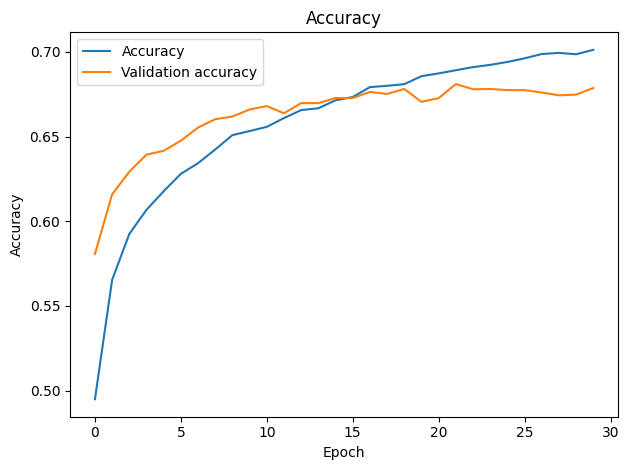

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

2023-06-05 09:05:19.222191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 09:05:19.223363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 09:05:19.224675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

625/625 [==============================] - 20s 31ms/step


In [26]:
test_x.shape

(20000, 300)

In [ ]:
categories = ['Human necessities', 'Performing_operations', 'Chemistry','Textiles','Fixed_constructions','Mechanical_engineering','Physics','Electricity','General']
print(classification_report(test_y, y_pred,  target_names=categories))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot()
plt.show()

# CNN model

In [43]:
def CNN_Model():
    model = Sequential()
    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.3))
    model.add(Convolution1D(100, 3, activation="relu"))
    model.add(GlobalAveragePooling1D())
    #model.add(Bidirectional(LSTM(32)))
    #model.add(Dropout(0.2))
    model.add(Dense(9, activation="softmax"))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    print(model.summary())
    
    return model 

In [44]:
CNN_model = CNN_Model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         9434700   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, None, 300)        0         
 lDropout1D)                                                     
                                                                 
 conv1d (Conv1D)             (None, None, 100)         90100     
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 9)                 909       
                                                                 
Total params: 9525709 (36.34 MB)
Trainable params: 910

In [ ]:
CNN_history = CNN_model.fit(train_x, train_y, batch_size=32, epochs=50, verbose=1, validation_data=(valid_x, valid_y))

Epoch 1/50
532/532 [==============================] - 5s 7ms/step - loss: 1.6736 - accuracy: 0.4072 - val_loss: 1.4837 - val_accuracy: 0.4953
Epoch 2/50
532/532 [==============================] - 3s 6ms/step - loss: 1.4439 - accuracy: 0.5009 - val_loss: 1.4155 - val_accuracy: 0.5103
Epoch 3/50
532/532 [==============================] - 3s 7ms/step - loss: 1.3913 - accuracy: 0.5170 - val_loss: 1.3914 - val_accuracy: 0.5160
Epoch 4/50
532/532 [==============================] - 3s 7ms/step - loss: 1.3635 - accuracy: 0.5301 - val_loss: 1.3610 - val_accuracy: 0.5193
Epoch 5/50
532/532 [==============================] - 3s 6ms/step - loss: 1.3504 - accuracy: 0.5314 - val_loss: 1.3682 - val_accuracy: 0.5093
Epoch 6/50
532/532 [==============================] - 3s 6ms/step - loss: 1.3372 - accuracy: 0.5322 - val_loss: 1.3430 - val_accuracy: 0.5263
Epoch 7/50
532/532 [==============================] - 3s 6ms/step - loss: 1.3237 - accuracy: 0.5421 - val_loss: 1.3283 - val_accuracy: 0.5347
Epoch 

In [68]:
from sklearn.metrics import classification_report

y_pred = CNN_model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

157/157 [==============================] - 0s 3ms/step


In [ ]:
categories = ['Human necessities', 'Performing_operations', 'Chemistry','Textiles','Fixed_constructions','Mechanical_engineering','Physics','Electricity','General']
print(classification_report(test_y, y_pred,  target_names=categories))

# GRU

In [ ]:
def rnn_gru():

    model = Sequential()
    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.5))
    model.add(GRU(100))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(9, activation="softmax"))
    model.compile(loss = '`', optimizer='adam', metrics = ['accuracy'])
    
    print(model.summary())
    
    return model

In [ ]:
rnn_gru = rnn_gru()

In [ ]:
history_gru = rnn_gru.fit(train_x, train_y, batch_size=32, epochs=50, verbose=1, validation_data=(valid_x, valid_y))

In [64]:
from sklearn.metrics import classification_report

y_pred = rnn_gru.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

157/157 [==============================] - 1s 7ms/step


In [ ]:
categories = ['Human necessities', 'Performing_operations', 'Chemistry','Textiles','Fixed_constructions','Mechanical_engineering','Physics','Electricity','General']
print(classification_report(test_y, y_pred,  target_names=categories))

# CNN LSTM

In [ ]:
def CNN_LSTM_Model():
    model = Sequential()
    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.3))
    model.add(Convolution1D(100, 3, activation="relu"))
    model.add(MaxPooling1D(pool_size=2))
    #model.add(LSTM(32))
    #model.add(Dense(units=1, activation='sigmoid'))
    #model.add(GlobalAveragePooling1D())
    model.add(Bidirectional(LSTM(32)))
    #model.add(Dropout(0.2))
    #model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(9, activation="softmax"))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    print(model.summary())
    
    return model 
 

In [ ]:
CNN_LSTM_Model = CNN_LSTM_Model()

In [ ]:
CNN_LSTM_history = CNN_LSTM_Model.fit(train_x, train_y, batch_size=32, epochs=20, verbose=1, validation_data=(valid_x, valid_y))

In [66]:
from sklearn.metrics import classification_report

y_pred = CNN_LSTM_Model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

157/157 [==============================] - 2s 11ms/step


In [ ]:
categories = ['Human necessities', 'Performing_operations', 'Chemistry','Textiles','Fixed_constructions','Mechanical_engineering','Physics','Electricity','General']
print(classification_report(test_y, y_pred,  target_names=categories))

# LSTM

In [ ]:
def rnn_lstm():
    
    model = Sequential()
    model.add(embedding_layer)
    model.add(LSTM(64))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(9, activation="softmax"))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    print(model.summary())
    
    return model

In [ ]:
rnn_lstm = rnn_lstm()

In [ ]:
history_lstm = rnn_lstm.fit(train_x, train_y, batch_size=64, epochs=50, verbose=1, validation_data=(valid_x, valid_y))

In [62]:
from sklearn.metrics import classification_report

y_pred = rnn_lstm.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

157/157 [==============================] - 1s 8ms/step


In [ ]:
categories = ['Human necessities', 'Performing_operations', 'Chemistry','Textiles','Fixed_constructions','Mechanical_engineering','Physics','Electricity','General']
print(classification_report(test_y, y_pred,  target_names=categories))

# Explaining Prediction

In [28]:
def get_layer_output(layer_name, data):
    # https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
    intermediate_layer_model = keras.Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    return intermediate_layer_model.predict(data)  

# Different layer

In [29]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    print(name)
    #print(weight)

embedding/embeddings:0
bidirectional/forward_lstm/lstm_cell_1/kernel:0
bidirectional/forward_lstm/lstm_cell_1/recurrent_kernel:0
bidirectional/forward_lstm/lstm_cell_1/bias:0
bidirectional/backward_lstm/lstm_cell_2/kernel:0
bidirectional/backward_lstm/lstm_cell_2/recurrent_kernel:0
bidirectional/backward_lstm/lstm_cell_2/bias:0
bidirectional_1/forward_lstm_1/lstm_cell_4/kernel:0
bidirectional_1/forward_lstm_1/lstm_cell_4/recurrent_kernel:0
bidirectional_1/forward_lstm_1/lstm_cell_4/bias:0
bidirectional_1/backward_lstm_1/lstm_cell_5/kernel:0
bidirectional_1/backward_lstm_1/lstm_cell_5/recurrent_kernel:0
bidirectional_1/backward_lstm_1/lstm_cell_5/bias:0
dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0


# catching weight

In [30]:
# suppress scientific notation
np.set_printoptions(suppress=True)

for name, weight in zip(names, weights):
    if name == 'bidirectional/backward_lstm/lstm_cell_2/kernel:0':
        kernel_0 = weight
    if name == 'bidirectional/backward_lstm/lstm_cell_2/recurrent_kernel:0':
        recurrent_kernel_0 = weight
    if name == 'bidirectional/backward_lstm/lstm_cell_2/bias:0':
        bias_0 = weight
    elif name == 'dense/kernel:0':
        output = weight



In [31]:
print("kernel_0", kernel_0.shape)
print("recurrent_kernel_0", recurrent_kernel_0.shape)
print("bias_0", bias_0.shape)
print("output", output.shape)

# self.Wxh_Left (240, 60)
# self.Whh_Left (240, 60)
# self.bxh_Left (240,)
# self.Why_Left (5, 60)

kernel_0 (300, 256)
recurrent_kernel_0 (64, 256)
bias_0 (256,)
output (64, 128)


In [32]:
Wxh = kernel_0.T  # shape 4d*e
Whh = recurrent_kernel_0.T  # shape 4d
bxh = bias_0.T  # shape 4d 
Why = output.T

print("Wxh", Wxh.shape)
print("Whh", Whh.shape)
print("bxh", bxh.shape)
print("Why", Why.shape)

Wxh (256, 300)
Whh (256, 64)
bxh (256,)
Why (128, 64)


# Stop Words

In [33]:
from nltk.corpus import stopwords
stopword_set = set(stopwords.words("english"))
if 'on' in stopword_set:
    print('hello')

hello


# Dictionary to word cloud

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def dictionary_word_to_score(words, scores):
    #assert len(words)==len(scores)
    max_s     = max(scores)
    min_s     = min(scores)
    
    dictionay = {}
    #print(len(words))
    for idx, w in enumerate(words):
        if w in stopword_set:
            score = 0.5
        else:
            if idx < len(scores):
                score = rescale_score_by_abs(scores[idx], max_s, min_s)
        #output_text = output_text + span_word(w, score, colormap) + " "
        if score > .50 :
            if w in dictionay:
                #print(w, "  ", score)
                if score > dictionay[w] :
                    dictionay[w] = score*100
            else:
                dictionay[w] = score*100
    print(dictionay)
'''
    word_cloud = WordCloud(
        width=7000,
        height=3000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate_from_frequencies(dictionay)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()
'''  

'\n    word_cloud = WordCloud(\n        width=7000,\n        height=3000,\n        random_state=1,\n        background_color="salmon",\n        colormap="Pastel1",\n        collocations=False,\n        stopwords=STOPWORDS,\n        ).generate_from_frequencies(dictionay)\n    plt.imshow(word_cloud)\n    plt.axis("off")\n    plt.show()\n'

# html heatmap

In [35]:
def html_heatmap (words, scores, cmap_name="bwr"):
    """
    Return word-level heatmap in HTML format,
    with words being the list of words (as string),
    scores the corresponding list of word-level relevance values,
    and cmap_name the name of the matplotlib diverging colormap.
    """
    
    colormap  = plt.get_cmap(cmap_name)
     
    #assert len(words)==len(scores)
    max_s     = max(scores)
    min_s     = min(scores)
    
    output_text = ""
    
    for idx, w in enumerate(words):
        if w in stopword_set:
            score = 0.5
        else:
            score = rescale_score_by_abs(scores[idx], max_s, min_s)
        output_text = output_text + span_word(w, score, colormap) + " "
    
    return output_text + "\n"

def rescale_score_by_abs (score, max_score, min_score):
    """
    Normalize the relevance value (=score), accordingly to the extremal
    relevance values (max_score and min_score), for visualization with a 
    diverging colormap. i.e. rescale positive relevance to the range 
    [0.5, 1.0], and negative relevance to the range [0.0, 0.5],
    using the highest absolute relevance for linear interpolation.
    """
    
    # CASE 1: positive AND negative scores occur --------------------
    if max_score>0 and min_score<0:
    
        if max_score >= abs(min_score):   # deepest color is positive
            if score>=0:
                return 0.5 + 0.5*(score/max_score)
            else:
                return 0.5 - 0.5*(abs(score)/max_score)

        else:                             # deepest color is negative
            if score>=0:
                return 0.5 + 0.5*(score/abs(min_score))
            else:
                return 0.5 - 0.5*(score/min_score)   
    
    # CASE 2: ONLY positive scores occur -----------------------------       
    elif max_score>0 and min_score>=0: 
        if max_score == min_score:
            return 1.0
        else:
            return 0.5 + 0.5*(score/max_score)
    
    # CASE 3: ONLY negative scores occur -----------------------------
    elif max_score<=0 and min_score<0: 
        if max_score == min_score:
            return 0.0
        else:
            return 0.5 - 0.5*(score/min_score)
          

def getRGB (c_tuple):
    return "#%02x%02x%02x"%(int(c_tuple[0]*255), int(c_tuple[1]*255), int(c_tuple[2]*255))

     
def span_word (word, score, colormap):
    return "<span style=\"background-color:"+getRGB(colormap(score))+"\">"+word+"</span>"

# Linear LRP

In [36]:
def lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor=0.0, debug=False):
    """
    LRP for a linear layer with input dim D and output dim M.
    Args:
    - hin:            forward pass input, of shape (D,)
    - w:              connection weights, of shape (D, M)
    - b:              biases, of shape (M,)
    - hout:           forward pass output, of shape (M,) (unequal to np.dot(w.T,hin)+b if more than one incoming layer!)
    - Rout:           relevance at layer output, of shape (M,)
    - bias_nb_units:  total number of connected lower-layer units (onto which the bias/stabilizer contribution is redistributed for sanity check)
    - eps:            stabilizer (small positive number)
    - bias_factor:    set to 1.0 to check global relevance conservation, otherwise use 0.0 to ignore bias/stabilizer redistribution (recommended)
    Returns:
    - Rin:            relevance at layer input, of shape (D,)
    """
    sign_out = np.where(hout[na,:]>=0, 1., -1.) # shape (1, M)
    
    numer    = (w * hin[:,na]) + ( bias_factor * (b[na,:]*1. + eps*sign_out*1.) / bias_nb_units ) # shape (D, M)
    # Note: here we multiply the bias_factor with both the bias b and the stabilizer eps since in fact
    # using the term (b[na,:]*1. + eps*sign_out*1.) / bias_nb_units in the numerator is only useful for sanity check
    # (in the initial paper version we were using (bias_factor*b[na,:]*1. + eps*sign_out*1.) / bias_nb_units instead)
    
    denom    = hout[na,:] + (eps*sign_out*1.)   # shape (1, M)
    
    message  = (numer/denom) * Rout[na,:]       # shape (D, M)
    
    Rin      = message.sum(axis=1)              # shape (D,)
    
    if debug:
        print("local diff: ", Rout.sum() - Rin.sum())
    # Note: 
    # - local  layer   relevance conservation if bias_factor==1.0 and bias_nb_units==D (i.e. when only one incoming layer)
    # - global network relevance conservation if bias_factor==1.0 and bias_nb_units set accordingly to the total number of lower-layer connections 
    # -> can be used for sanity check
    
    return Rin

# LRP

In [50]:
def LRP(target_data, target_class) :
    
    #원본 소스에서 E embedding은 전체에 대한 단어 사전이고, x는 embedding된 인풋이다.  
    # w_indices [109, 11995, 25, 18263, 25, 973, 3138, 6389, 372]

    x = get_layer_output('embedding', target_data)
    e = x.shape[1]

   ################# forword
    T = target_data.shape[0]
    d = int(256/4)  # hidden units
    C = Why.shape[0] # number of classes
    
    idx    = np.hstack((np.arange(0,d), np.arange(2*d,4*d))).astype(int) # indices of gates i,f,o together
    idx_i, idx_g, idx_f, idx_o = np.arange(0,d), np.arange(d,2*d), np.arange(2*d,3*d), np.arange(3*d,4*d) # indices of gates i,g,f,o separately

    h  = np.zeros((T,d))
    c  = np.zeros((T,d))

    gates_xh  = np.zeros((T, 4*d))  
    gates_hh  = np.zeros((T, 4*d)) 
    gates_pre = np.zeros((T, 4*d))  
    gates     = np.zeros((T, 4*d))  

    for t in range(T):
        gates_xh[t]     = np.dot(Wxh, x[t])
        gates_hh[t]     = np.dot(Whh, h[t-1])
        gates_pre[t]    = gates_xh[t] + gates_hh[t] + bxh
        gates[t, idx]    = 1.0/(1.0 + np.exp(- gates_pre[t,idx]))
        gates[t,idx_g]  = np.tanh(gates_pre[t,idx_g]) 
        c[t]            = gates[t,idx_f]*c[t-1] + gates[t,idx_i]*gates[t,idx_g]
        h[t]            = gates[t,idx_o]*np.tanh(c[t])

    s = np.dot(Why, h[t])    

    ################# backwork
    dx     = np.zeros(x.shape)

    dh          = np.zeros((T, d))
    dc          = np.zeros((T, d))
    dgates_pre  = np.zeros((T, 4*d))  # gates pre-activation
    dgates      = np.zeros((T, 4*d))  # gates activation

    ds               = np.zeros((C))
    ds[target_class] = 1.0
    dy               = ds.copy()

    #맨처음을 0으로 시작하지 않게 위한조치
    dh[T-1]     = np.dot(Why.T, dy)

    for t in reversed(range(T)): 
        dgates[t,idx_o]    = dh[t] * np.tanh(c[t])  # do[t]
        dc[t]             += dh[t] * gates[t,idx_o] * (1.-(np.tanh(c[t]))**2) # dc[t]
        dgates[t,idx_f]    = dc[t] * c[t-1]         # df[t]
        dc[t-1]            = dc[t] * gates[t,idx_f] # dc[t-1]
        dgates[t,idx_i]    = dc[t] * gates[t,idx_g] # di[t]
        dgates[t,idx_g]    = dc[t] * gates[t,idx_i] # dg[t]
        dgates_pre[t,idx]  = dgates[t,idx] * gates[t,idx] * (1.0 - gates[t,idx]) # d ifo pre[t]
        dgates_pre[t,idx_g]= dgates[t,idx_g] *  (1.-(gates[t,idx_g])**2) # d g pre[t]
        dh[t-1]            = np.dot(Whh.T, dgates_pre[t])
        dx[t]              = np.dot(Wxh.T, dgates_pre[t])

    ################# LRP
    eps=0.001 
    bias_factor=0.0
    Rx  = np.zeros(x.shape)
    Rh  = np.zeros((T+1, d))
    Rc  = np.zeros((T+1, d))
    Rg  = np.zeros((T,   d)) # gate g only

    Rout_mask            = np.zeros((C))
    Rout_mask[target_class] = 1.0  

    # format reminder: lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor)
    Rh[T-1]  = lrp_linear(h[T-1], Why.T, np.zeros((C)), s, s*Rout_mask, 2*d, eps, bias_factor, debug=False)  

    for t in reversed(range(T)):
        Rc[t]   += Rh[t]
        Rc[t-1]  = lrp_linear(gates[t,idx_f]*c[t-1], np.identity(d), np.zeros((d)), c[t], Rc[t], 2*d, eps, bias_factor, debug=False)
        Rg[t]    = lrp_linear(gates[t,idx_i]*gates[t,idx_g], np.identity(d), np.zeros((d)), c[t], Rc[t], 2*d, eps, bias_factor, debug=False)
        Rx[t]    = lrp_linear(x[t], Wxh[idx_g].T, bxh[idx_g], gates_pre[t,idx_g], Rg[t], d+e, eps, bias_factor, debug=False)
        Rh[t-1]  = lrp_linear(h[t-1], Whh[idx_g].T, bxh[idx_g], gates_pre[t,idx_g], Rg[t], d+e, eps, bias_factor, debug=False)    

    return s, dx, Rx, Rh[-1].sum()

# index to Word

In [38]:
#word_index = imdb.get_word_index()
index_word = {v:k for k,v in word_index.items()}

#values = ','.join(str(v) for v in value_list)

def index_to_word(word):
    full_sentence = ""
    for w in word:
        if w != 0:
            full_sentence = full_sentence + ' ' + index_word.get(w)
    #print('word: ', word)
    #full_sentence = ' '.join(index_word.get(w) for w in word)
    return full_sentence.split()

# Integer to String

In [39]:
def int_to_str(target_class):
    if target_class == 1:
        return "Human necessities"
    elif target_class == 2:
        return "Performing_operations"
    elif target_class == 3:
        return "Chemistry"
    elif target_class == 4:
        return "Textiles"
    elif target_class == 5:
        return "Fixed_constructions"
    elif target_class == 6:
        return "Mechanical_engineering"
    elif target_class == 7:
        return "Physics"
    elif target_class == 8:
        return "Electricity"
    elif target_class == 9:
        return "General"

In [71]:
predictions = model.predict(train_x) #test_x

2125/2125 [==============================] - 67s 31ms/step


# Class List

In [72]:
A_list = []
B_list = []
C_list = []
D_list = []
E_list = []
F_list = []
G_list = []
H_list = []
Y_list = []

categories = ['Human necessities', 'Performing_operations', 'Chemistry','Textiles','Fixed_constructions','Mechanical_engineering','Physics','Electricity','General']

for i in range(len(train_y)): #test_y
    if np.argmax(predictions[i]) == 1:
        A_list.append(i)
    elif np.argmax(predictions[i]) == 2:
        B_list.append(i)
    elif np.argmax(predictions[i]) == 3:
        C_list.append(i)
    elif np.argmax(predictions[i]) == 4:
        D_list.append(i)
    elif np.argmax(predictions[i]) == 5:
        E_list.append(i)
    elif np.argmax(predictions[i]) == 6:
        F_list.append(i)
    elif np.argmax(predictions[i]) == 7:
        G_list.append(i)
    elif np.argmax(predictions[i]) == 8:
        H_list.append(i)
    elif np.argmax(predictions[i]) == 9:
        Y_list.append(i)

In [42]:
print(len(A_list)+len(B_list)+len(C_list)+len(D_list)+len(E_list)+len(F_list)+len(G_list)+len(H_list)+len(Y_list))

18119


# Sequence to Words

In [73]:
index_word = {v: k for k, v in word_index.items()} # map back
seqs = train_x #test_x
words = []

def seqToWords():
    for seq in seqs:
        if len(seq):
            words.append(index_word.get(seq[0]))
        else:
            words.append(' ')    
            
    return words

In [44]:
words = seqToWords()

# Sequence to Text

In [45]:
# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    
    return words

# Explainer Heatmap

In [87]:
def explainer(class_list):   
    for index, i in enumerate(class_list):
        
    
        target_data = train_x[i] #test_x
        #print(target_data)
        #print(target_data.shape)
        target_class = train_y[i]#test_y
        #print("Target Class: ", target_class)
        
        #if np.argmax(predictions[i]) != target_class:
         #   continue

        scores, Gx, Rx, R_rest = LRP(target_data, target_class)
    
        R_words          = np.sum(Rx, axis=1)                       # compute word-level LRP relevances
        R_words_SA       = (np.linalg.norm(Gx,ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
        R_words_GI       = np.dot(target_data, Gx) 
    
        words = index_to_word(target_data)
        '''
        try:
            words = index_to_word(target_data)
            #continue
        #words = seqToWords()
        except:
            continue
        '''
        if len(words) > 0 :
            
            print("Predicted label:", int_to_str(np.argmax(predictions[i])), "Actual label:", int_to_str(target_class))

            print("LRP heatmap:")
            display(HTML(html_heatmap(words, R_words)))

            print("SA heatmap:")
            display(HTML(html_heatmap(words, R_words_SA)))

            print("GI heatmap:")
            display(HTML(html_heatmap(words, R_words_GI)))
            
            print("Word Cloud")
            dictionary_word_to_score(words, R_words_SA)

            print("-----------------------------------------------------------")


# Explainer Word Count

In [47]:
def explainer_word_cloud(class_list):   
    for index, i in enumerate(class_list):
    
        target_data = test_x[i]
        #print(target_data)
        #print(target_data.shape)
        target_class = np.argmax(test_y[i])

        scores, Gx, Rx, R_rest = LRP(target_data, target_class)
    
        R_words          = np.sum(Rx, axis=1)                       # compute word-level LRP relevances
        R_words_SA       = (np.linalg.norm(Gx,ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
        R_words_GI       = np.dot(target_data, Gx) 
    
        words = index_to_word(target_data)
        '''
        try:
            words = index_to_word(target_data)
            print(len(words))
            #continue
        #words = seqToWords()
        except:
            continue
        '''
        if len(words) > 0 :
            print("Predicted label:", int_to_str(np.argmax(predictions[i])), "Actual label:", int_to_str(target_class))

            print("Word Cloud")
            print("-----------------------------------------------------------")
            dictionary_word_to_score(words, scores)

            print("-----------------------------------------------------------")

In [80]:
print(len(H_list))

7147


# Chemistry Example Explanation

In [ ]:
print("The degree to which each word affects the prediction of class C")
explainer(C_list)